In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [3]:
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df=pd.read_csv('LPGBUTANE.csv')

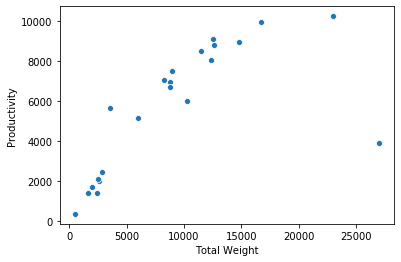

In [5]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [6]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.0,22.000000,22.000000,18.000000
mean,86.954545,199196.045455,30.647273,50.278182,9077.171045,0.091818,0.009182,0.0,0.0,17.522727,5623.393182,43140.277778
std,17.496877,3051.803939,34.653919,55.511016,7018.780209,0.070416,0.007042,0.0,0.0,43.043045,3184.375182,14808.810374
min,52.000000,192612.000000,0.000000,0.000000,492.000000,0.000000,0.000000,0.0,0.0,0.000000,353.530000,3995.000000
25%,76.000000,200241.000000,3.817500,4.105000,2662.500000,0.030000,0.003000,0.0,0.0,0.000000,2167.805000,42714.500000
50%,89.500000,200623.500000,31.000000,35.500000,8800.000000,0.090000,0.009000,0.0,0.0,0.000000,6326.715000,49753.000000
75%,100.250000,200678.250000,36.387500,57.642500,12517.839750,0.127500,0.012750,0.0,0.0,0.000000,8357.402500,51738.000000
max,114.000000,200920.000000,166.400000,185.750000,27000.000000,0.270000,0.027000,0.0,0.0,156.700000,10225.160000,58691.000000


In [7]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [8]:
lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(lm.intercept_)

3911.799819403509


In [10]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.208956


In [11]:
predictions = lm.predict(X_test)

In [12]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 2143.572675006062
MSE: 5480937.450007034
RMSE: 2341.1402029795295
r2_score: 0.49133277916099416


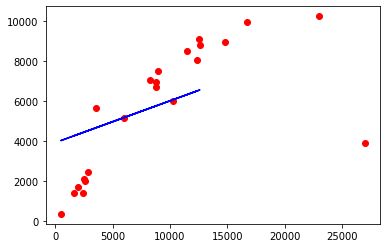

In [13]:
plt.scatter(X,y, color='red')
plt.plot(X_test, predictions,color="blue")

In [14]:
joblib.dump(lm,"Lpg_Butane.pkl")#only execute if rmse is less than half of mean of productivity

['Lpg_Butane.pkl']